## INFO 371 Problem Set 6

*Name*: Xiaobing Xu

*Section*: INFO 371 AA

*Date*: May 22nd, 2022

*Late Day*: Use 1 late day

In [24]:
import pandas as pd
import numpy as np

#### 1.1

In [236]:
emails = pd.read_csv('lingspam-emails .csv.bz2', sep='\t')
emails.head()

,spam,files,message
0,False,3-1msg1.txt,Subject: re : 2 . 882 s - > np np > date : su...
1,False,3-1msg2.txt,Subject: s - > np + np the discussion of s - ...
2,False,3-1msg3.txt,Subject: 2 . 882 s - > np np . . . for me it ...
3,False,3-375msg1.txt,"Subject: gent conference "" for the listserv ""..."
4,False,3-378msg1.txt,Subject: query : causatives in korean could a...


In [25]:
emails = pd.read_csv("../Data/all-data/lingspam-emails.csv.bz2",sep='\t')
emails.head()

,spam,files,message
0,False,3-1msg1.txt,Subject: re : 2 . 882 s - > np np > date : su...
1,False,3-1msg2.txt,Subject: s - > np + np the discussion of s - ...
2,False,3-1msg3.txt,Subject: 2 . 882 s - > np np . . . for me it ...
3,False,3-375msg1.txt,"Subject: gent conference "" for the listserv ""..."
4,False,3-378msg1.txt,Subject: query : causatives in korean could a...


#### 1.2

In [26]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer(binary=True)
# define vectorizer
X = vectorizer.fit_transform(emails.message)
Y = emails.spam.values
# vectorize your data. Note: this creates a sparse matrix, # use .toarray() if you run into trouble
vocabulary = vectorizer.get_feature_names()
# in case you want to see what are the actual words


In [27]:
DTM = pd.DataFrame(X.toarray(), columns=vocabulary)

#### 1.3

In [28]:
from sklearn.model_selection import train_test_split

Xt, Xv, Yt, Yv = train_test_split(X, Y, test_size = 0.2)

#### 1.4

- `P_S1`: Pr(category = S)
- `P_S0`: Pr(category = NS)
- `P_W1`: Pr(word = 1)
- `P_W0`: Pr(word = 0)
- `P_W1_S1`: Pr(word = 1 | category = S)
- `P_W0_S1`: Pr(word = 0 | category = S)
- `P_W1_S0`: Pr(word = 1 | category = NS)
- `P_W0_S0`: Pr(word = 0 | category = NS)

#### 2.1

In [29]:
# a. emails correstponding to
emails.message.values[946:949]

array(["Subject: efl position in israel  i have been asked to post this job advertisement . please respond to the address in the ad . center for technological education affiliated with tel - aviv university the center for technological education in holon is in the process of establishing an english as a foreign language unit . the unit will provide the required english courses for all students of the center . it will be associated with the faculty of social sciences . we are currently looking to fill the position of head of this unit . the position carries a teaching load of twelve hours per semester as well as responsibility for the academic , professional and organizational aspects of the unit . in addition , scholarly activity and participation in the academic life of the faculty of the social sciences is expected . candidates should have a masters degree in a relevant domain as well as several years of teaching english as a foreign language at one of the universities in israel . sc

In [30]:
# b. words corresponding to
vocabulary[30037:30042]

# c. 1 indicates that the corresponding email contains the word

# d. 0 indicates that the corresponding email does not contain the word

['interventions', 'intervient', 'interview', 'interviewed', 'interviewing']

#### 2.2

In [12]:
spam_count = np.count_nonzero(Y)
non_spam_count = np.size(Y) - np.count_nonzero(Y)

# majority classfier accuracy
if spam_count > non_spam_count:
  print(np.mean(Y))
else:
  print(1 - np.mean(Y))

0.8337366055997235


#### 2.3

In [41]:
lg_P_S1 = np.log(np.mean(Yt))
lg_P_S0 = np.log(np.mean(~Yt))
lg_P_W1_S1 = np.log(Xt.toarray()[Yt].mean(axis = 0)) 
lg_P_W1_S0 = np.log(Xt.toarray()[~Yt].mean(axis = 0)) 
print('Log Pr(W=1|S=1)', lg_P_W1_S1)
print('Log Pr(W=1|S=0)', lg_P_W1_S0)

<ipython-input-41-bd18f733a0bb>:3: RuntimeWarning: divide by zero encountered in log
  lg_P_W1_S1 = np.log(Xt.toarray()[Yt].mean(axis = 0))


Log Pr(W=1|S=1) [-1.11175308 -1.15224444 -5.94803499 ...        -inf -5.94803499
        -inf]
Log Pr(W=1|S=0) [-1.8164003  -2.9808258  -7.56579328 ... -7.56579328        -inf
 -7.56579328]


<ipython-input-41-bd18f733a0bb>:4: RuntimeWarning: divide by zero encountered in log
  lg_P_W1_S0 = np.log(Xt.toarray()[~Yt].mean(axis = 0))


#### 2.4

In [35]:
def compute_prob(content):
    idx = np.where(content == 1)
    tmpt_lg_P_S1 = lg_P_S1 + np.sum(lg_P_W1_S1[np.array(idx)])
    tmpt_lg_P_S0 = lg_P_S0 + np.sum(lg_P_W1_S0[np.array(idx)])
    return [tmpt_lg_P_S0, tmpt_lg_P_S1]
result0 = np.apply_along_axis(compute_prob, 0, Xt.toarray())
result0

array([[-3.72848638e+03, -1.89543331e+03, -1.29135429e+01, ...,
        -1.46544896e+01, -7.74573479e+00, -4.80224268e+00],
       [-5.02513076e+03, -2.52937558e+03, -2.06015324e+01, ...,
        -1.46544917e+01, -1.46544917e+01, -1.46544917e+01]])

In [36]:
result1 = np.apply_along_axis(compute_prob, 1, Xt.toarray())
result1

array([[ -119.72887873,  -185.35832011],
       [ -156.22747489,  -304.66505131],
       [ -688.41425307, -1328.66846632],
       ...,
       [-2786.76251968, -4803.69918812],
       [ -113.45438561,  -171.56366323],
       [ -463.91973678,  -895.7980158 ]])

In [37]:
result0.shape

(2, 60925)

In [38]:
result1.shape

(2314, 2)

#### 2.5

We have to compute 2 dimension (probabilities) for each email, because we have to compare these probabilities to classify the email as spam or non-spam.

#### 2.6

In [17]:
def predict(content):
  idx = np.where(content == 1)
  tmpt_lg_P_S1 = lg_P_S1 + np.sum(lg_P_W1_S1[np.array(idx)])
  tmpt_lg_P_S0 = lg_P_S0 + np.sum(lg_P_W1_S0[np.array(idx)])
  if tmpt_lg_P_S1 > tmpt_lg_P_S0:
    return True
  else:
    return False 

In [18]:
Y_predict = np.apply_along_axis(predict, 1, Xv.toarray())
Y_predict.shape

(579,)

#### 2.7

We have need higher the value of the log-likelihood(579), which results in a better model fitting a dataset, and it is useful for comparing two or more models.

#### 2.8

In [33]:
def predict(content):
    idx = np.where(content == 1)
    tmpt_lg_P_S1 = lg_P_S1 + np.sum(lg_P_W1_S1[np.array(idx)])
    tmpt_lg_P_S0 = lg_P_S0 + np.sum(lg_P_W1_S0[np.array(idx)])
    return [tmpt_lg_P_S0, tmpt_lg_P_S1]
S0 = np.apply_along_axis(predict, 0, Xt.toarray())
S0

array([[-3.72848638e+03, -1.89543331e+03, -1.29135429e+01, ...,
        -1.46544896e+01, -7.74573479e+00, -4.80224268e+00],
       [-5.02513076e+03, -2.52937558e+03, -2.06015324e+01, ...,
        -1.46544917e+01, -1.46544917e+01, -1.46544917e+01]])

In [34]:
S1 = np.apply_along_axis(predict, 1, Xt.toarray())
S1

array([[ -119.72887873,  -185.35832011],
       [ -156.22747489,  -304.66505131],
       [ -688.41425307, -1328.66846632],
       ...,
       [-2786.76251968, -4803.69918812],
       [ -113.45438561,  -171.56366323],
       [ -463.91973678,  -895.7980158 ]])

#### 2.9

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Yv, Y_predict)

array([[483,   0],
       [ 82,  14]])

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(Yv, Y_predict)

0.8583765112262521

In [21]:
1 - np.mean(Yv)

0.8341968911917098

#### 2.10

The cause of such a problem of many infinities was the 0 probability of count of word with regards to few cases of the word, relying on a single rare value for categorization. Thus, we need smoothing methodadding a
small positive number to the counts to caculate probability.

#### 3.1 & 3.2

In [22]:
def fitting(Xt, Yt, alpha):
  n_spam = np.sum(Yt) + alpha
  n_non_spam = np.sum(~Yt) + alpha
  n_total = n_spam + n_non_spam
  spam_counts = Xt.toarray()[Yt].sum(0) + alpha
  non_spam_counts = Xt.toarray()[~Yt].sum(0) + alpha
  lg_P_S1 = np.log(n_spam / n_total) 
  lg_P_S0 = np.log(n_non_spam / n_total) 
  lg_P_W1_S1 = np.log(spam_counts / (n_spam + alpha)) 
  lg_P_W1_S0 = np.log(non_spam_counts / (n_non_spam + alpha))

  return lg_P_S1, lg_P_S0, lg_P_W1_S1, lg_P_W1_S0


#### 3.3

In [31]:
for alpha in range(5):
  lg_P_S1, lg_P_S0, lg_P_W1_S1, lg_P_W1_S0 = fitting(Xt, Yt, alpha / 10)
  Y_predict = np.apply_along_axis(predict, 1, Xv.toarray())
  print('Alpha:', alpha / 10)
  print('Confusion Matrix:\n', confusion_matrix(Yv, Y_predict))
  print('Accuracy:', accuracy_score(Yv, Y_predict))

<ipython-input-22-18bc80bcd65d>:9: RuntimeWarning: divide by zero encountered in log
  lg_P_W1_S1 = np.log(spam_counts / (n_spam + alpha))
<ipython-input-22-18bc80bcd65d>:10: RuntimeWarning: divide by zero encountered in log
  lg_P_W1_S0 = np.log(non_spam_counts / (n_non_spam + alpha))


Alpha: 0.0
Confusion Matrix:
 [[481   0]
 [ 87  11]]
Accuracy: 0.8497409326424871
Alpha: 0.1
Confusion Matrix:
 [[474   7]
 [  0  98]]
Accuracy: 0.9879101899827288
Alpha: 0.2
Confusion Matrix:
 [[470  11]
 [  0  98]]
Accuracy: 0.9810017271157168
Alpha: 0.3
Confusion Matrix:
 [[467  14]
 [  0  98]]
Accuracy: 0.9758203799654577
Alpha: 0.4
Confusion Matrix:
 [[462  19]
 [  0  98]]
Accuracy: 0.9671848013816926


#### 3.4

In [254]:
alphas = np.logspace(-8, 1, num=10)
accuracies = []
for i in alphas:
  lg_P_S1, lg_P_S0, lg_P_W1_S1, lg_P_W1_S0 = fitting(Xt, Yt, i)
  Y_predict = np.apply_along_axis(predict, 1, Xv.toarray())
  accuracies.append(accuracy_score(Yv, Y_predict))
  print('Alpha:', i)
  print('Confusion Matrix:\n', confusion_matrix(Yv, Y_predict))
  print('Accuracy:', accuracy_score(Yv, Y_predict))

Alpha: 1e-08
Confusion Matrix:
 [[486   0]
 [ 11  82]]
Accuracy: 0.9810017271157168
Alpha: 1e-07
Confusion Matrix:
 [[486   0]
 [ 11  82]]
Accuracy: 0.9810017271157168
Alpha: 1e-06
Confusion Matrix:
 [[486   0]
 [  8  85]]
Accuracy: 0.9861830742659758
Alpha: 1e-05
Confusion Matrix:
 [[486   0]
 [  7  86]]
Accuracy: 0.9879101899827288
Alpha: 0.0001
Confusion Matrix:
 [[486   0]
 [  7  86]]
Accuracy: 0.9879101899827288
Alpha: 0.001
Confusion Matrix:
 [[486   0]
 [  4  89]]
Accuracy: 0.9930915371329879
Alpha: 0.01
Confusion Matrix:
 [[486   0]
 [  3  90]]
Accuracy: 0.9948186528497409
Alpha: 0.1
Confusion Matrix:
 [[481   5]
 [  1  92]]
Accuracy: 0.9896373056994818
Alpha: 1.0
Confusion Matrix:
 [[436  50]
 [  0  93]]
Accuracy: 0.9136442141623489
Alpha: 10.0
Confusion Matrix:
 [[ 58 428]
 [  0  93]]
Accuracy: 0.2607944732297064


According to the accuracies above, the model performs best with an alpha of 0.001. 

#### 3.5

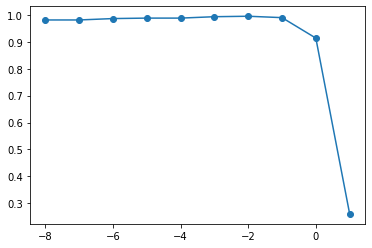

In [255]:
import matplotlib.pyplot as plt

_ = plt.plot(np.log10(alphas), accuracies, marker="o")

#### 4.1

When a word's Pr(category = S | word = 1) is large and Pr(category = NS | word = 1) is small, it means that the word belongs to spam category given a word. Meanwhile, when log-likihood is higher, it means that the better a model fits a dataset. Thus, when logPr(category = S | word = 1)-logPr(category = NS | word = 1) is large, it means that the logPr(category = S | word = 1) is large, resulting a better model with higher accuracy.

#### 4.2

In [256]:
# probabilities with best accuracy
lg_P_S1, lg_P_S0, lg_P_W1_S1, lg_P_W1_S0 = fitting(Xt, Yt, 0.001)
lg_P_W1 = np.log((np.sum(Xt) + 0.001) / (Xt.shape[0] + 0.002))
lg_P_S1_W1 = lg_P_W1_S1 * lg_P_S1 / lg_P_W1
lg_P_S0_W1 = lg_P_W1_S0 * lg_P_S0 / lg_P_W1
lg_diffs = lg_P_S1_W1 - lg_P_S0_W1
best_idx = np.argsort(-lg_diffs)[:10]
worst_idx = np.argsort(lg_diffs)[:10]
best_vocab = vocabulary[best_idx]
worst_vocab = vocabulary[worst_idx]
(best_vocab, worst_vocab)

(array(['linguistic', 'theory', 'syntax', 'deadline', 'abstract',
        'abstracts', 'committee', 'structure', 'grammar', 'workshop'],
       dtype=object),
 array(['subject', 'you', 'and', 'to', 'the', 'your', 'for', 'of', 'is',
        'this'], dtype=object))

The result especially for least likely spam words (worst_vocab) makes sense to me. This is because those are common conjunction and words which nearly exist in every sentences and cannot predict spam email since its high frequency. The best 10 words to predict spam words are interesting to me.